In [2]:
from dis import dis
# from tkinter.tix import AUTO
from requests import head
import torch
import config
import os
from glob import glob
from shutil import copyfile
import pandas as pd
import re
import numpy as np
from math import sqrt
import math
import tensorflow as tf
from keras import regularizers
from tensorflow.keras import Model, Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from re import X
import numpy as np
import torch
import pandas as pd
from torch.nn.utils.rnn import pack_padded_sequence
from torch.utils.data import DataLoader
from CustomDataset import CustomRawDataset
from model_dispatcher import dispatch_model
# from model_dispatcher_cnn import dispatch_model
import config
from torch import nn
import os
from glob import glob
from torch.optim import Adam, SGD
from torch.optim.lr_scheduler import ReduceLROnPlateau
from datetime import date, timedelta, datetime
import time
import random
from torch.utils.tensorboard import SummaryWriter
from CustomDataset import custom_collate_fn
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation,TimeDistributed
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
raw_angle_files_1 = glob(os.path.join("D:\Research_Project\My_project_22\input\preprocessed", "*", "*.csv"))
# print(raw_angle_files_1)
all_filenames = [i for i in raw_angle_files_1]
df = pd.concat(map(pd.read_csv, all_filenames),ignore_index=True)
data=df
data.to_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\merged.csv",index=False)
#df=pd.read_csv(r"D:\Research_Project\My_project_22\FEATURES_EXTRACTED\DISTANCES\both_hand_frontup_left_leg_frontup\aatish_both_hand_frontup_left_leg_frontup_trial1_interpolated.csv")
   
# data=df
# print(data.shape)
# target=data['54']
# data=data.drop(['54'],axis=1)
# # data.head()
# print(data.shape)
# AutoEncoder(data)
# data['12']=target
# print(data.shape)

In [4]:
data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\merged.csv")
data.head()
# target=data['166']
# data=data.drop(['166'],axis=1)
target=data['94']
data=data.drop(['94'],axis=1)
# data.head()
# print(data.shape)
# AutoEncoder(data)
# data['12']=target
# print(data.shape)
print(data.shape)
print(target.shape)

(12260, 94)
(12260,)


<AxesSubplot:>

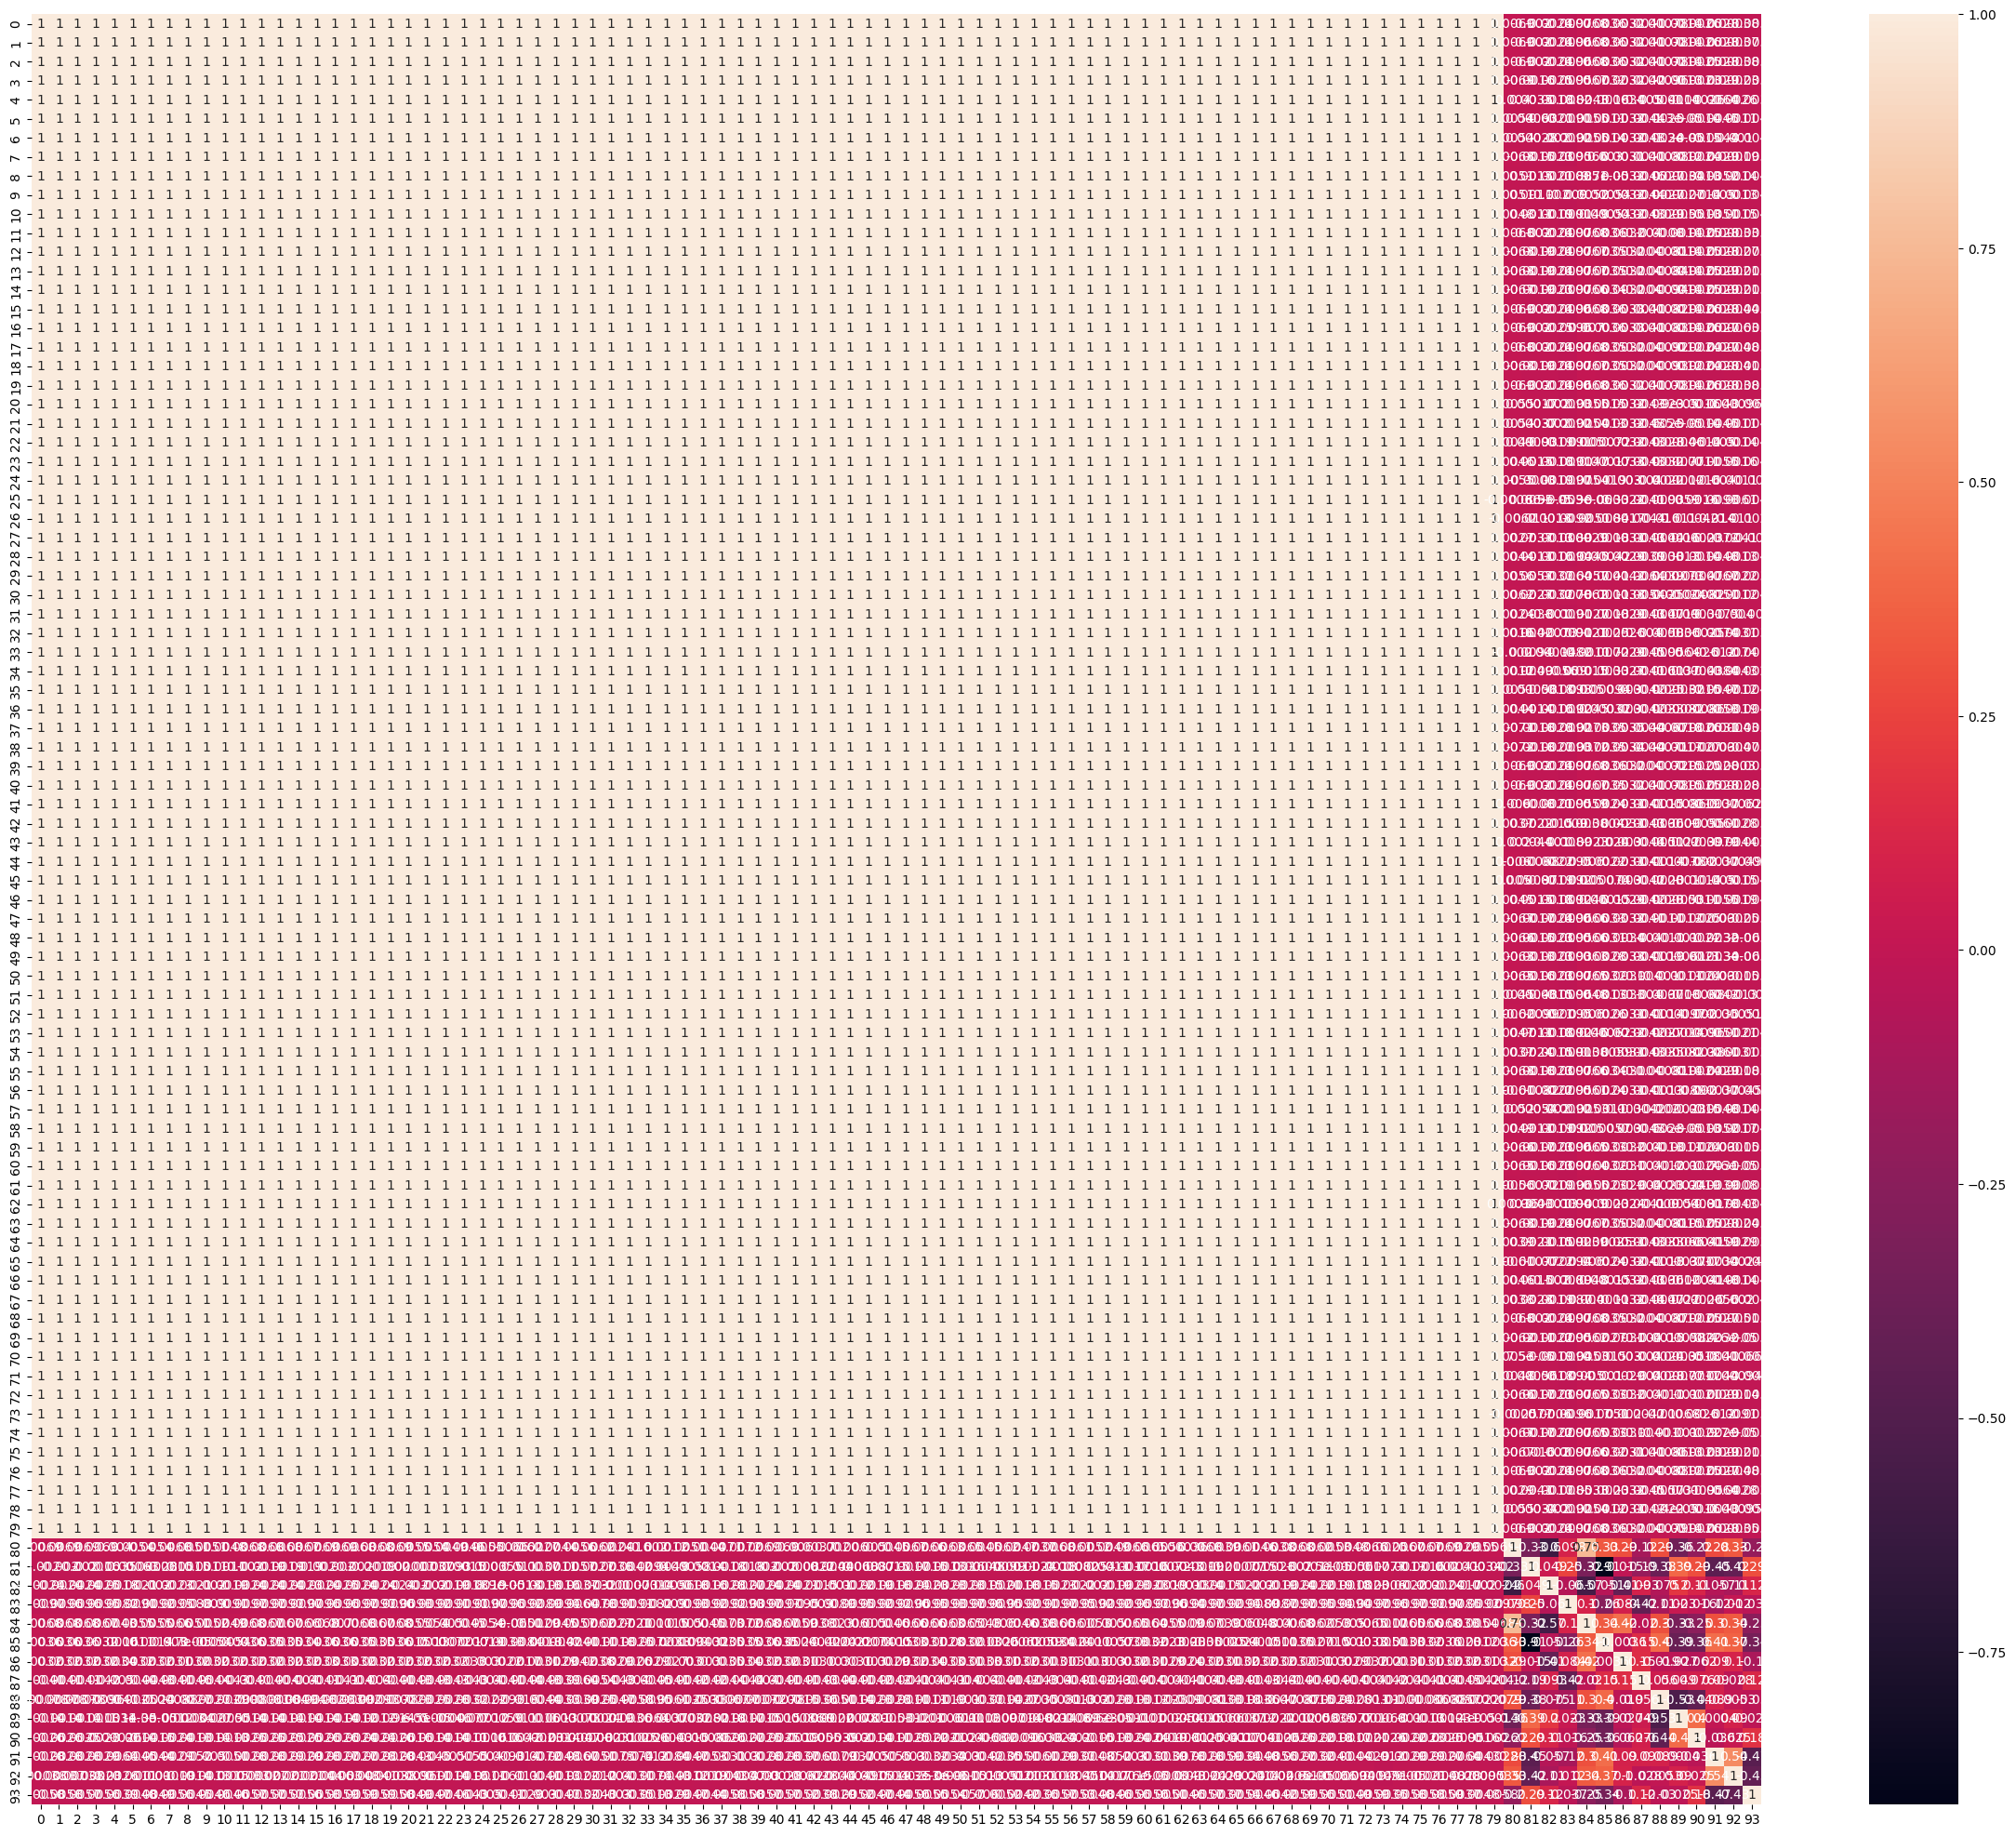

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
target=data['26']
# data=data.drop(['26'],axis=1)
corr=data.corr()
plt.figure(figsize=(30,25))
sns.heatmap(corr,annot=True)

In [72]:
def tree_based_classifier_feature_extraction(data,target):
    model = ExtraTreesClassifier()
    model.fit(data,target)
    # print(data.head())
    # print(target.head())
    # print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
    #plot graph of feature importances for better visualization
    # print("data col",data.columns)
    feat_importances = pd.Series(model.feature_importances_, index=data.columns)
    # print(feat_importances)

    lst=list(feat_importances.nlargest(70).index)
    # print(lst)
    # for i in lst:
    #     print(type(i))
    for i in range(166):
        i=str(i)
        if i not in lst:
             data=data.drop(i,axis=1)
            #  data.head()
    print(data.shape)
    return data,target

In [73]:
data,target=tree_based_classifier_feature_extraction(data,target)
data.head()

(12260, 70)


0         1         2         3         7        11        15  \
0  0.324883  0.314224  0.475169  0.257537  0.253687  0.332558  0.333042   
1  0.322438  0.312178  0.470942  0.260437  0.252057  0.329395  0.331251   
2  0.321594  0.311465  0.469381  0.261410  0.251537  0.328360  0.330656   
3  0.321504  0.311379  0.469090  0.261484  0.251446  0.328265  0.330592   
4  0.321446  0.311360  0.469092  0.261522  0.251438  0.328174  0.330541   

         19        38        50  ...       154       156       157       158  \
0  0.237068  0.180405  0.414414  ... -1.125618  1.597459 -0.140846  1.246003   
1  0.235476  0.183243  0.436329  ... -1.077973  1.614270 -0.147442  1.296214   
2  0.234946  0.184580  0.442395  ... -1.061660  1.619788 -0.148863  1.306293   
3  0.234879  0.184797  0.441379  ... -1.055622  1.619716 -0.148812  1.302433   
4  0.234850  0.184559  0.441859  ... -1.047045  1.619620 -0.149545  1.296863   

        160       161       162       163       164       165  
0  0.162107 -0.027582  0.081955  0.113375  0.031990  0.131282  
1  0.157114 -0.009114  0.106628  0.088090  0.029938  0.127583  
2  0.156264 -0.002401  0.115748  0.079567  0.029953  0.126045  
3  0.155941 -0.001148  0.116238  0.078291  0.030147  0.125562  
4  0.155132 -0.000888  0.115037  0.077394  0.030157  0.125631  

[5 rows x 70 columns]

In [75]:
def PCA(X , num_components):
    """Principal Component analysis reduces high dimensional data to lower dimensions while capturing maximum variability of the dataset"""
    X_meaned = X - np.mean(X , axis = 0)
    cov_mat = np.cov(X_meaned , rowvar = False)
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]

    eigenvector_subset = sorted_eigenvectors[:,0:num_components]

    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
    return X_reduced

In [76]:
reduced_features_df =  pd.DataFrame(PCA(data,num_components=70))

In [77]:
data=reduced_features_df
data.head()

0         1         2         3         4         5         6   \
0 -99.287140  1.019259 -0.818197  1.062504 -0.204817  1.076339  0.173853   
1 -99.285428  0.968431 -0.800190  1.021689 -0.170126  1.082364  0.232145   
2 -99.284789  0.949535 -0.797947  1.009251 -0.162125  1.082056  0.243508   
3 -99.284742  0.947811 -0.799375  1.006537 -0.166205  1.081159  0.241477   
4 -99.284788  0.949075 -0.795626  0.999658 -0.171673  1.080944  0.241135   

         7         8         9   ...        60        61        62        63  \
0 -0.097162  0.235575 -0.333445  ... -0.030043  0.006375  0.031212  0.016050   
1 -0.087194  0.238364 -0.246924  ... -0.007782  0.002356  0.013077  0.011479   
2 -0.089567  0.245917 -0.227038  ... -0.007303  0.001124  0.006058  0.008372   
3 -0.092875  0.251665 -0.227687  ... -0.010704  0.000918  0.003538  0.008126   
4 -0.091485  0.257038 -0.224623  ... -0.009097 -0.000149  0.003656  0.007483   

         64        65        66        67        68        69  
0 -0.016113 -0.013357  0.010480 -0.026960 -0.037769  0.012131  
1 -0.010184  0.003623 -0.002323 -0.016124 -0.021291  0.017594  
2 -0.009270  0.009066 -0.006352 -0.013970 -0.018626  0.018661  
3 -0.009273  0.009943 -0.006877 -0.013993 -0.018807  0.017982  
4 -0.009391  0.010800 -0.007098 -0.013253 -0.017855  0.017719  

[5 rows x 70 columns]

In [78]:
len1=data.shape[1]
l1=list(range(0,len1))
l2=[]
for i in l1:
    i=str(i)
    l2.append(i)
l1=l2
    
data.columns=l1
data.head()
data['70']=target
# data=data.sample(frac=1)
data.head()

0         1         2         3         4         5         6  \
0 -99.287140  1.019259 -0.818197  1.062504 -0.204817  1.076339  0.173853   
1 -99.285428  0.968431 -0.800190  1.021689 -0.170126  1.082364  0.232145   
2 -99.284789  0.949535 -0.797947  1.009251 -0.162125  1.082056  0.243508   
3 -99.284742  0.947811 -0.799375  1.006537 -0.166205  1.081159  0.241477   
4 -99.284788  0.949075 -0.795626  0.999658 -0.171673  1.080944  0.241135   

          7         8         9  ...        61        62        63        64  \
0 -0.097162  0.235575 -0.333445  ...  0.006375  0.031212  0.016050 -0.016113   
1 -0.087194  0.238364 -0.246924  ...  0.002356  0.013077  0.011479 -0.010184   
2 -0.089567  0.245917 -0.227038  ...  0.001124  0.006058  0.008372 -0.009270   
3 -0.092875  0.251665 -0.227687  ...  0.000918  0.003538  0.008126 -0.009273   
4 -0.091485  0.257038 -0.224623  ... -0.000149  0.003656  0.007483 -0.009391   

         65        66        67        68        69  70  
0 -0.013357  0.010480 -0.026960 -0.037769  0.012131   0  
1  0.003623 -0.002323 -0.016124 -0.021291  0.017594   0  
2  0.009066 -0.006352 -0.013970 -0.018626  0.018661   0  
3  0.009943 -0.006877 -0.013993 -0.018807  0.017982   0  
4  0.010800 -0.007098 -0.013253 -0.017855  0.017719   0  

[5 rows x 71 columns]

<AxesSubplot:>

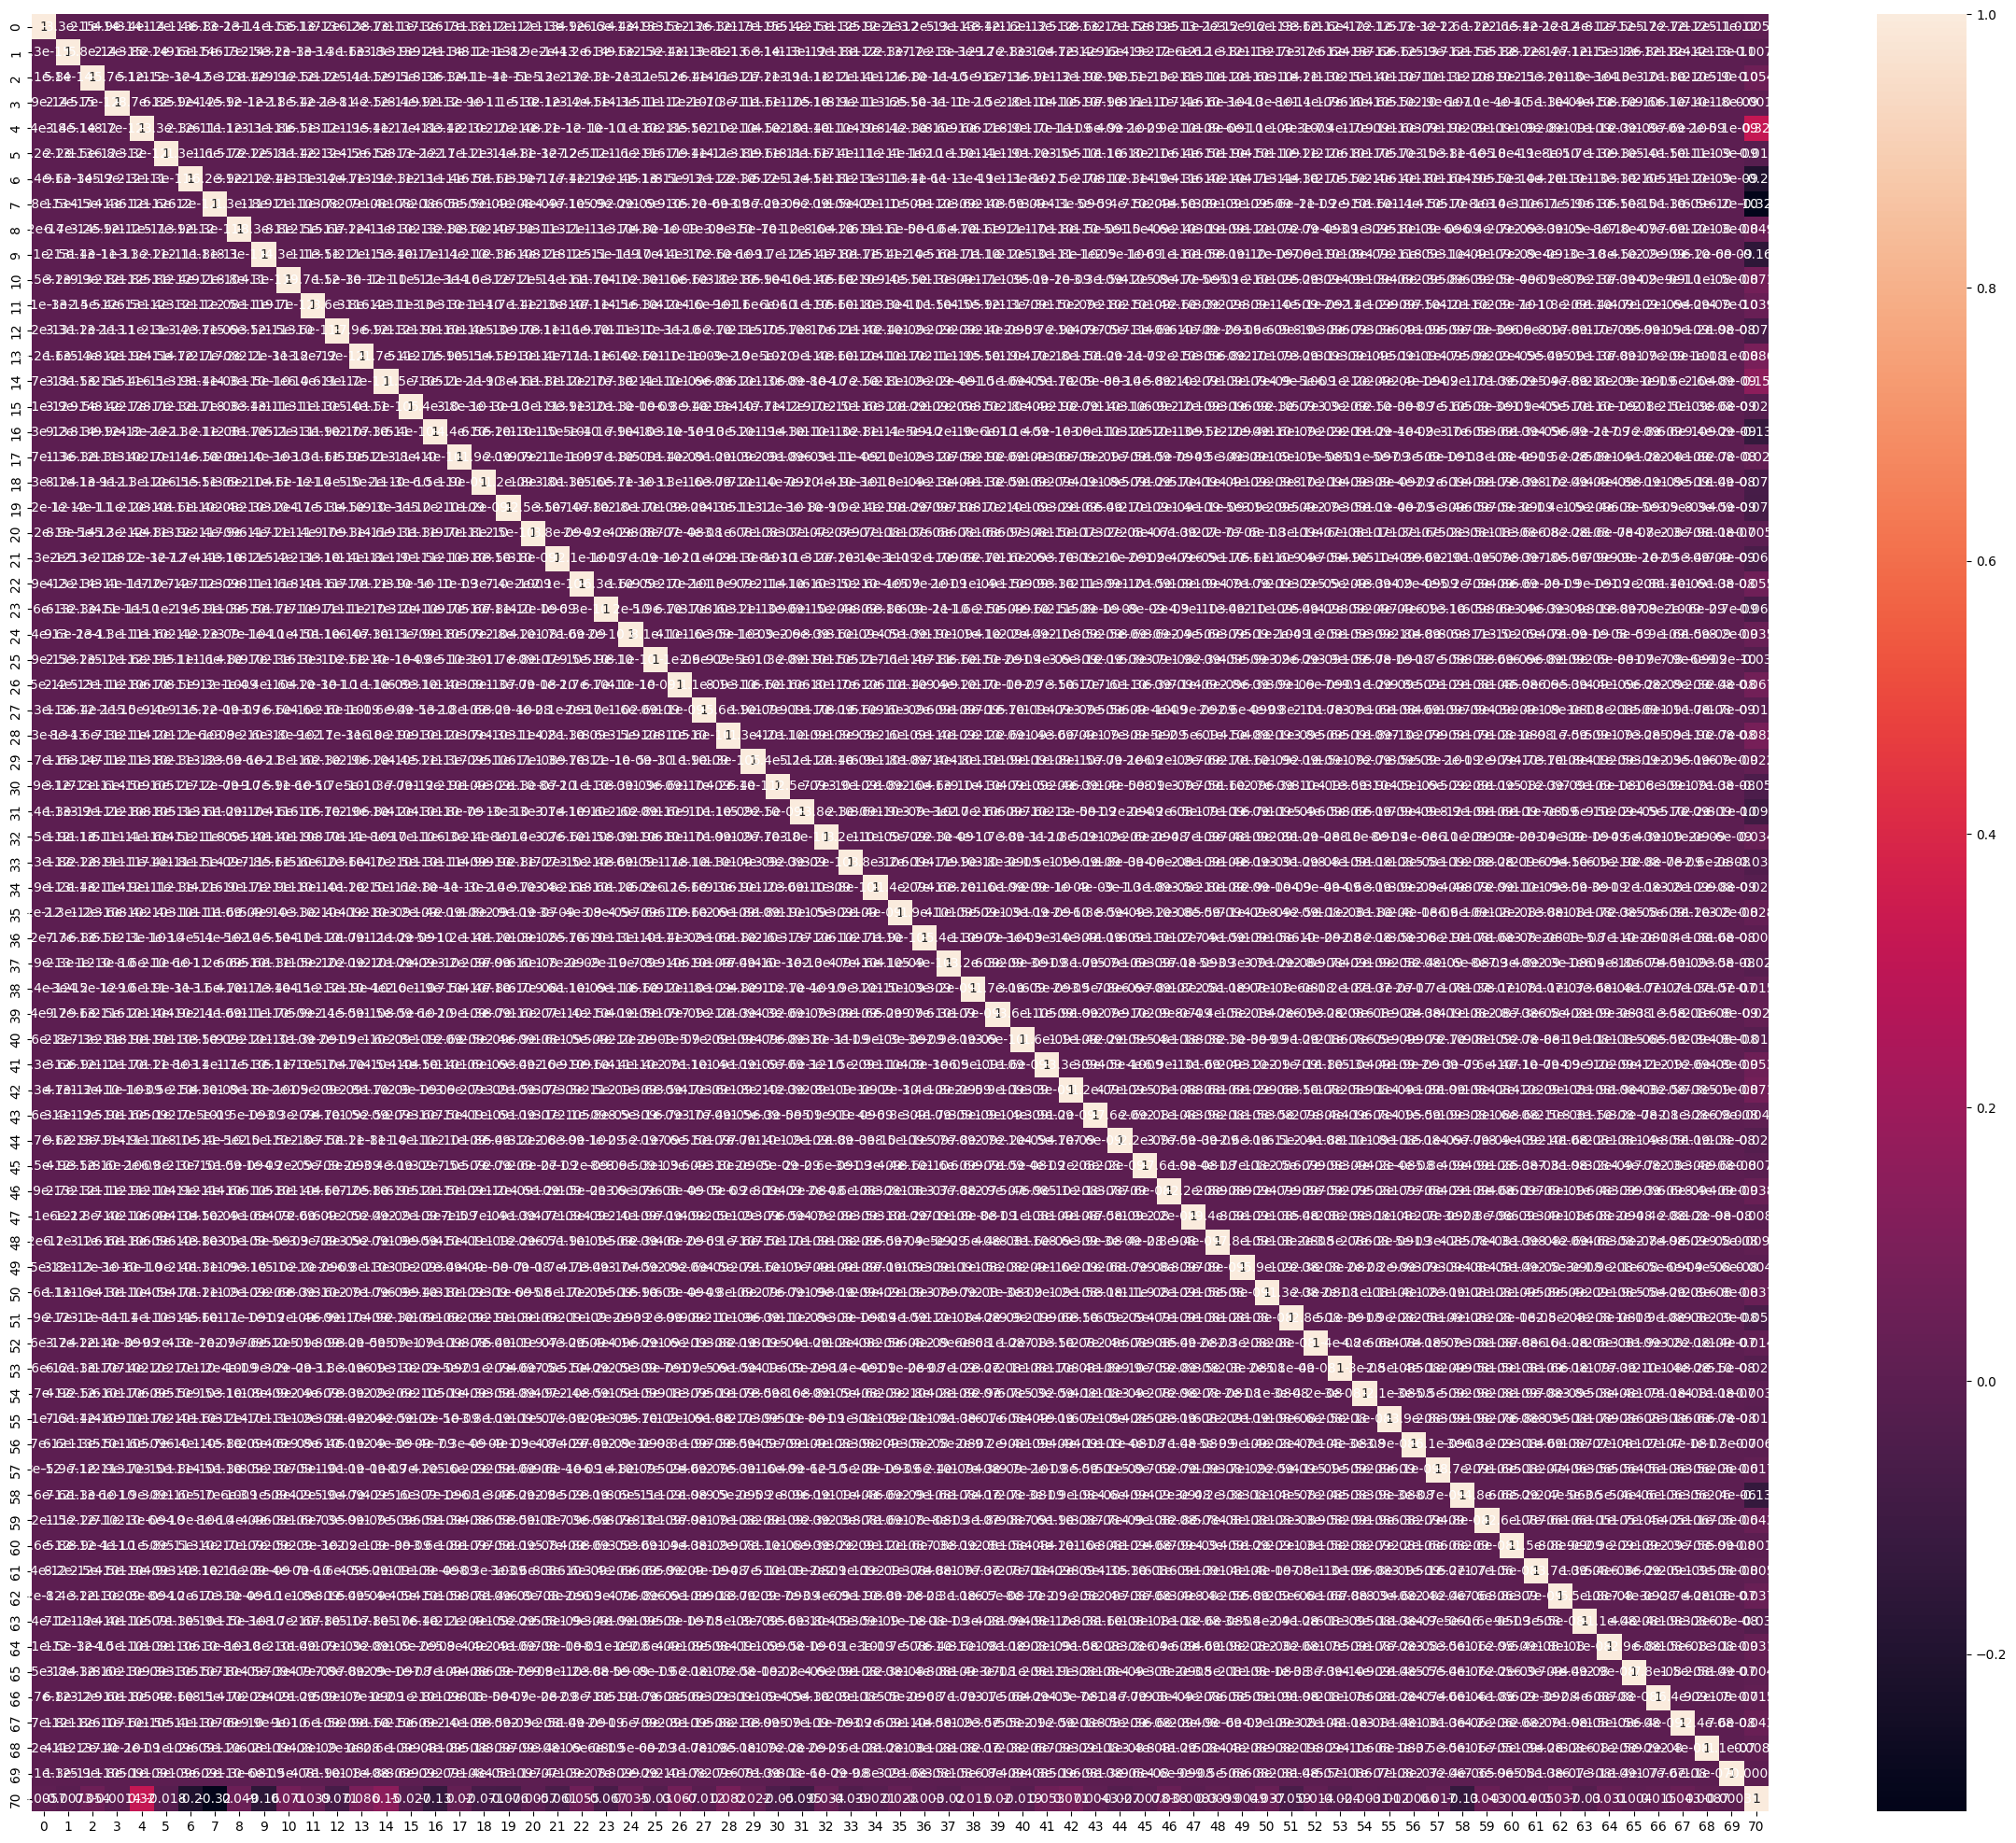

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
target=data['26']
# data=data.drop(['26'],axis=1)
corr=data.corr()
plt.figure(figsize=(30,25))
sns.heatmap(corr,annot=True)

In [80]:
threshold=0.6
df=abs(corr['70'])
result=df[df>threshold]
result
for i in range(70):
    index=str(i)
    df=abs(corr[index])
    result=df[df>threshold]
    print('correlation of feature ',i,'\n',result,'\n')
# data=data.drop(['2','4','5','8','11'],axis=1)
# data.head()
data.shape

correlation of feature  0 
 0    1.0
Name: 0, dtype: float64 

correlation of feature  1 
 1    1.0
Name: 1, dtype: float64 

correlation of feature  2 
 2    1.0
Name: 2, dtype: float64 

correlation of feature  3 
 3    1.0
Name: 3, dtype: float64 

correlation of feature  4 
 4    1.0
Name: 4, dtype: float64 

correlation of feature  5 
 5    1.0
Name: 5, dtype: float64 

correlation of feature  6 
 6    1.0
Name: 6, dtype: float64 

correlation of feature  7 
 7    1.0
Name: 7, dtype: float64 

correlation of feature  8 
 8    1.0
Name: 8, dtype: float64 

correlation of feature  9 
 9    1.0
Name: 9, dtype: float64 

correlation of feature  10 
 10    1.0
Name: 10, dtype: float64 

correlation of feature  11 
 11    1.0
Name: 11, dtype: float64 

correlation of feature  12 
 12    1.0
Name: 12, dtype: float64 

correlation of feature  13 
 13    1.0
Name: 13, dtype: float64 

correlation of feature  14 
 14    1.0
Name: 14, dtype: float64 

correlation of feature  15 
 15    1.0
N

(12260, 71)

In [54]:
def cal_snr(x):
    mean=np.mean(x)
    standard_deviation=np.std(x)
    snr=abs(mean/standard_deviation)
    return snr

In [61]:
# print(data['0'])
# type(data['0'].values)
max_attribute=0
max_snr=0
for i in range(58):
    id=str(i)
    snr=cal_snr(data[id].values)
    print(i,"->",snr," ")
    if(max_snr<snr):
        max_snr=snr
        max_attribute=i

print("max_attribute_1 ",max_attribute)


0 -> 0.028239081327851003  
1 -> 0.028245722043645855  
2 -> 0.029781587389918065  
3 -> 0.028438188736287482  
4 -> 0.03053688382007455  
5 -> 0.027542975812789354  
6 -> 0.029375353950492556  
7 -> 0.028235884634014795  
8 -> 0.026538583152894674  
9 -> 0.020888174944047693  
10 -> 0.03665082802875638  
11 -> 0.03241489342946123  
12 -> 0.030397349125901  
13 -> 0.02981053935624914  
14 -> 0.031695151312978204  
15 -> 0.03169420563079693  
16 -> 0.031695151312978204  
17 -> 0.05621003507227722  
18 -> 0.0632822759890589  
19 -> 0.0420324112873156  
20 -> 0.027750682798482626  
21 -> 0.04231359214180111  
22 -> 0.03101029361212036  
23 -> 0.030938033486584502  
24 -> 0.013799400966648766  
25 -> 0.04427549252978083  
26 -> 0.01377881105124964  
27 -> 0.046640183370379916  
28 -> 0.013837303831736186  
29 -> 0.04494781188208903  
30 -> 0.01635978808976702  
31 -> 0.043710648792937734  
32 -> 0.01150979659848268  
33 -> 0.043461263896742305  
34 -> 0.017461264078170533  
35 -> 0.0442874

In [62]:
max_attribute=0
max_snr=0

id=str(58)
snr=cal_snr(data[id].values)
print(id,"->",snr," ")
if(max_snr<snr):
    max_snr=snr
    max_attribute=id
id=str(60)
snr=cal_snr(data[id].values)
print(id,"->",snr," ")
if(max_snr<snr):
    max_snr=snr
    max_attribute=id
id=str(61)
snr=cal_snr(data[id].values)
print(id,"->",snr," ")
if(max_snr<snr):
    max_snr=snr
    max_attribute=id

print("max_attribute_2 -->",max_attribute)

58 -> 1.564037086210558  
60 -> 1.1259382075132267  
61 -> 1.5445296310872931  
max_attribute_2 --> 58


In [63]:
max_attribute=0
max_snr=0

id=str(59)
snr=cal_snr(data[id].values)
print(id,"->",snr," ")
if(max_snr<snr):
    max_snr=snr
    max_attribute=id
id=str(62)
snr=cal_snr(data[id].values)
print(id,"->",snr," ")
if(max_snr<snr):
    max_snr=snr
    max_attribute=id
print("max_attribute_3 -->",max_attribute)

59 -> 0.9148520276238468  
62 -> 0.8862329117775404  
max_attribute_3 --> 59


In [64]:
# print(type(data['0']))
# data=pd.DataFrame([data['0'].values,data['2'].values])
reduced_df=data[['18','58','59','63','64','65','66','67','68','69','70']]
reduced_df.head()
len1=reduced_df.shape[1]
l1=list(range(0,len1))
l2=[]
for i in l1:
    i=str(i)
    l2.append(i)
l1=l2
    
reduced_df.columns=l1
# # reduced_df[len1]=target
reduced_df.head()


0         1         2         3         4         5         6  \
0  0.126636  1.650141  0.184621  1.246003  0.162107 -0.027582  0.081955   
1  0.125783  1.632925  0.161124  1.296214  0.157114 -0.009114  0.106628   
2  0.126060  1.627664  0.153572  1.306293  0.156264 -0.002401  0.115748   
3  0.126405  1.626473  0.153380  1.302433  0.155941 -0.001148  0.116238   
4  0.126424  1.624955  0.153946  1.296863  0.155132 -0.000888  0.115037   

          7         8         9  10  
0  0.113375  0.031990  0.131282   0  
1  0.088090  0.029938  0.127583   0  
2  0.079567  0.029953  0.126045   0  
3  0.078291  0.030147  0.125562   0  
4  0.077394  0.030157  0.125631   0

In [66]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :10], sequences[end_ix-1, 10:]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [67]:
data=reduced_df
data=pd.get_dummies(data,columns=['10'])
data=data.to_numpy()
x,y=split_sequences(data,6)
# x=x[None:]
# print(x.shape)
# print(y.shape)
# data=data.to_numpy()
print(data.shape)

# y=data.iloc[:,26:]
# x=data.iloc[:,:26]
# # x=data[-1:26]
# print(x.shape)
# print(y.shape)
# x=x.to_numpy()
# y=y.to_numpy()
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 0.2)
print(x_train.shape)
print(y_train.shape)
print(type(y_train))



model = Sequential()
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(6,10)))
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(Dense(100, activation='relu'))
model.add(layers.BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.summary()


# model.summary()
# # log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# # tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# # print(x.shape)
history = model.fit(x_train, y_train,batch_size=config.BATCH_SIZE,epochs=100,validation_data=(x_test,y_test),verbose=1)
results = model.evaluate(x_test, y_test)
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
y_test=np.argmax(y_test,axis=1)
# print(y_pred)


(12260, 20)
(9804, 6, 10)
(9804, 10)
<class 'numpy.ndarray'>
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             1984      
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 64)             12352     
                                                                 
 dropout (Dropout)           (None, 2, 64)             0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 100)               6500  

In [68]:
cf_matrix=metrics.confusion_matrix(y_test,y_pred)
print('Confusion matrix\n',cf_matrix)
print(metrics.classification_report(y_test,y_pred))

Confusion matrix
 [[274   1   2   1   0   0   0   0   0   0]
 [ 13 206  11   0   0   0   0   0   0   0]
 [  1   0 294   2   0   0   0   0   0   0]
 [  0   5  18 232   0   0   0   0   0   0]
 [  5   0   0   0 227   7   2   6   0   1]
 [  0   0   1   0   4 189   6   3   2   0]
 [  5   1   2   0   0   1 254   0   2   2]
 [  0   0  10   0   1   3   5 215   1   0]
 [  2   0   1   0   7   0   4   6 221   1]
 [  0   0   0   0   7   3   7   1  11 165]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       278
           1       0.97      0.90      0.93       230
           2       0.87      0.99      0.92       297
           3       0.99      0.91      0.95       255
           4       0.92      0.92      0.92       248
           5       0.93      0.92      0.93       205
           6       0.91      0.95      0.93       267
           7       0.93      0.91      0.92       235
           8       0.93      0.91      0.92       242
          

In [69]:
print('specificity:')
tot=0
for i in range (10):
    sum=0
    for j in range(10):
        sum=sum+cf_matrix[i,j]
    spec=cf_matrix[i,i]/sum
    tot+=spec
    print(i," ",spec)
print('specificity avg\n',tot/10)

specificity:
0   0.9856115107913669
1   0.8956521739130435
2   0.98989898989899
3   0.9098039215686274
4   0.9153225806451613
5   0.9219512195121952
6   0.951310861423221
7   0.9148936170212766
8   0.9132231404958677
9   0.8505154639175257
specificity avg
 0.9248183479187275


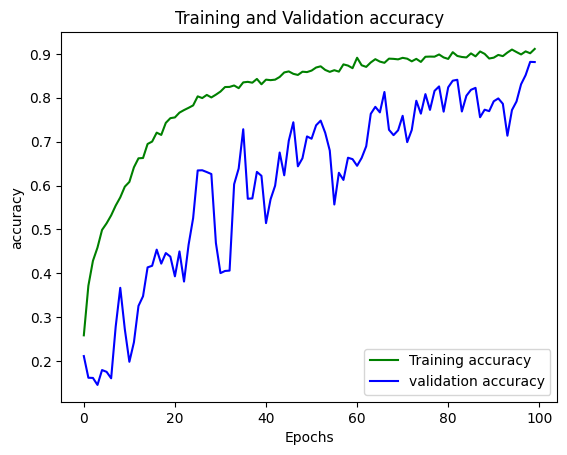

In [23]:
acc_train = history.history["accuracy"]
acc_val = history.history["val_accuracy"]
epochs = range(1,99)
plt.plot(acc_train, 'g', label='Training accuracy')
plt.plot(acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

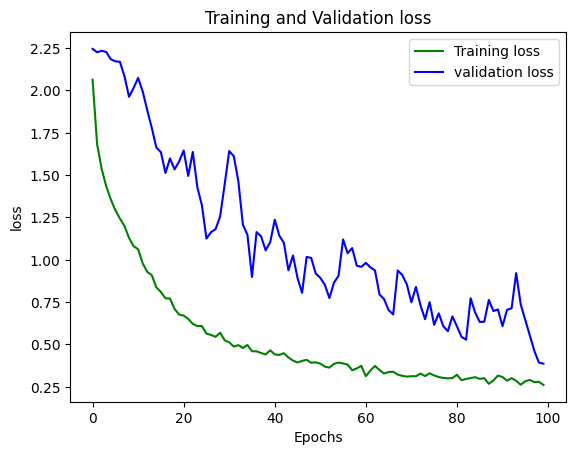

In [24]:
loss_train = history.history["loss"]
loss_val = history.history["val_loss"]
epochs = range(1,99)
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()